In [9]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(11)

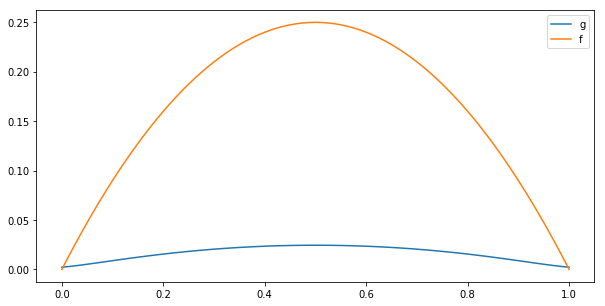

In [10]:
a = 20

def f(t):
    return t * (1 - t)

def g(s):
    return 2 / a * (1 - s) * s + \
        1 / (a ** 2) * (np.exp(-a * s) + np.exp(-a * (1 - s))) + \
        2 / (a ** 3) * (np.exp(-a * s) + np.exp(-a * (1 - s)) - 2)

s_grid = np.linspace(0, 1, num=101)
t_grid = np.linspace(0, 1, num=81)

plt.figure(figsize=(10,5))
plt.plot(s_grid, g(s_grid), label = 'g')
plt.plot(t_grid, f(t_grid), label = 'f')
plt.legend(loc = 'upper right')

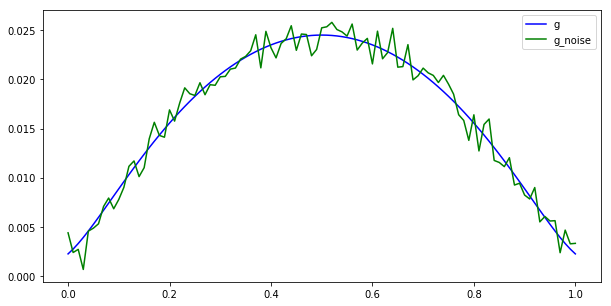

In [11]:
def A_f(i, j):
    return 1 / 80 * np.exp(-20 * np.abs(t_grid[j] - s_grid[i]))

A = np.fromfunction(A_f, (101, 81), dtype=int)

std_dev = 0.05 * np.max(g(s_grid))
noise = np.random.normal(0, std_dev, (101,))
g_noise = g(s_grid) + noise

plt.figure(figsize=(10,5))
plt.plot(s_grid, g(s_grid), label = 'g', color = 'blue')
plt.plot(s_grid, g_noise, label = 'g_noise', color = 'green')
plt.legend(loc = 'upper right')

(-1.7, 2.3)

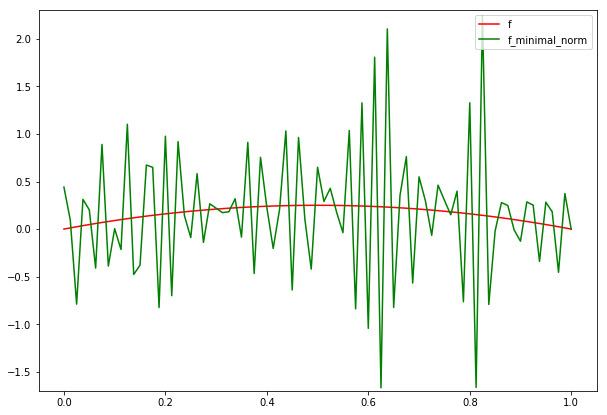

In [12]:
f_minnorm = np.linalg.pinv(A).dot(g_noise)
plt.figure(figsize=(10,7))
plt.plot(t_grid, f(t_grid), label = 'f', color = 'red')
plt.plot(t_grid, f_minnorm, label = 'f_minimal_norm', color = 'green')
plt.legend(loc = 'upper right')
plt.ylim(-1.7, 2.3)

In [13]:
singular_values = np.linalg.svd(A, compute_uv=False)

0.0108693895009
0.0108693895009
0.0107188777504
0.0106589222257
0.0105940794735
0.0103430722244
6


(-1.7, 2.3)

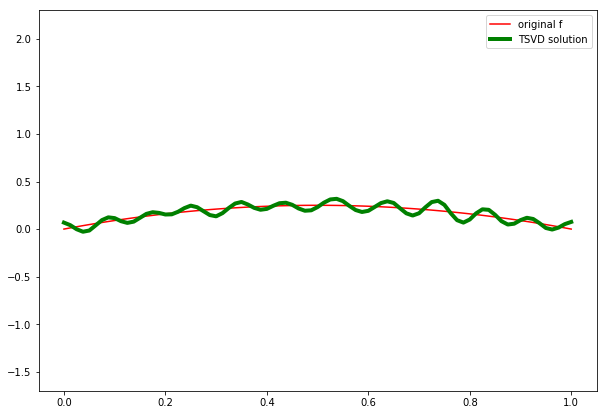

In [14]:
# Solve using truncated SVD.
l = singular_values.shape[0]
eps = 9 * np.std(noise)

f_minnorm = np.linalg.pinv(A, rcond=singular_values[0]).dot(g_noise)

i = 0
while (np.linalg.norm(A.dot(f_minnorm) - g_noise) > eps and i < l):
    print(np.linalg.norm(A.dot(f_minnorm) - g_noise))
    f_minnorm = np.linalg.pinv(A, rcond=singular_values[i]).dot(g_noise)
    i += 1
    
print(i)
plt.figure(figsize=(10,7))
plt.plot(t_grid, f(t_grid), label = 'original f', color = 'red')
plt.plot(t_grid, f_minnorm, lw=4, label = 'TSVD solution', color = 'green')
plt.legend(loc = 'upper right')
plt.ylim(-1.7, 2.3)

0.0102791709922
0: 0.1795596314906299
1: 0.1438529157461724
2: 0.1153262983303608
3: 0.09255327783021035
4: 0.07439466974458099
5: 0.059941415718165136
6: 0.04846871252321914
7: 0.03939904031098577
8: 0.0322720660482552
9: 0.026719736505919942
10: 0.022445275405754632
11: 0.019205418225836064
12: 0.01679608216972098
13: 0.015042365507919743
14: 0.013793483168438885
15: 0.012921717471623885
16: 0.012322917922913696
17: 0.011916101036066938
18: 0.011641179560818641
19: 0.011455312253816517
20: 0.011328878424283238
21: 0.011241845238999884
22: 0.011180865009299781
23: 0.011137127815395885
24: 0.011104849653522562
25: 0.011080241437638534
26: 0.011060820176795669
27: 0.011044954730088628
28: 0.01103156868553708
29: 0.011019946959040234
30: 0.011009610236717484
31: 0.01100023354345091
32: 0.010991593415921035
33: 0.010983533585742423
34: 0.010975942633277272
35: 0.010968739385293982
36: 0.010961863327561615
37: 0.010955268271155767


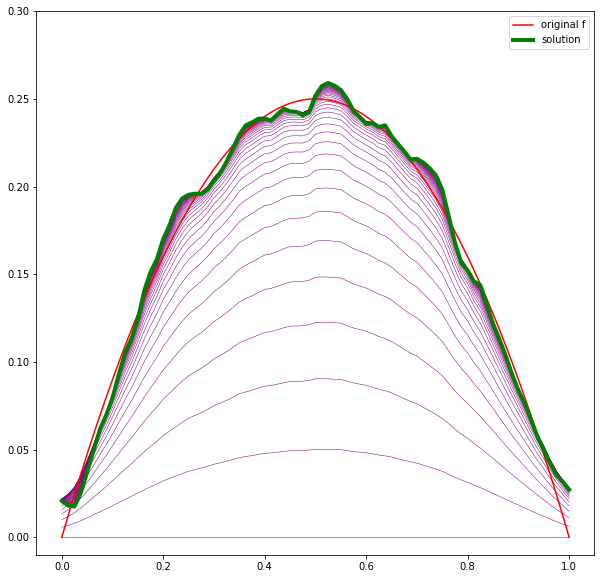

In [15]:
# Now to Landweber-Friedman iteration...
beta = 0.2 / (np.linalg.norm(A, ord=2)) ** 2
f_n = np.zeros((81,))

def T(f, beta, g_noise):
    return f + beta * (A.T.dot(g_noise) - A.T.dot(A).dot(f))

plt.figure(figsize=(10,10))
plt.ylim(-0.01, 0.3)

print(eps)
i = 0
while (np.linalg.norm(A.dot(f_n) - g_noise) > eps and i < 38):
    print("{}: {}".format(i, np.linalg.norm(A.dot(f_n) - g_noise)))
    plt.plot(t_grid, f_n, lw=0.5,color = 'purple')
    
    f_n = T(f_n, beta, g_noise)
    i += 1

plt.plot(t_grid, f(t_grid), label = 'original f', color = 'red')
plt.plot(t_grid, f_n, lw=4, label = 'solution', color = 'green')
plt.legend(loc = 'upper right')

38


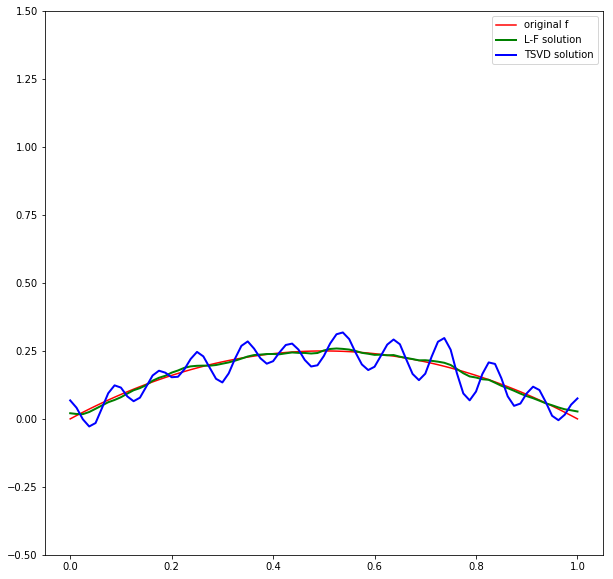

In [16]:
plt.figure(figsize=(10,10))
plt.plot(t_grid, f(t_grid), label = 'original f', color = 'red')
plt.plot(t_grid, f_n, lw=2, label = 'L-F solution', color = 'green')
plt.plot(t_grid, f_minnorm, lw=2, label = 'TSVD solution', color = 'blue')

plt.legend(loc = 'upper right')
plt.ylim(-0.5, 1.5)
print(i)